In [82]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

from nktools import fmod_pi
from order_parameters import *

In [83]:
spacetime = fmod_pi(np.loadtxt("spacetime_test.txt"))
print "space:", spacetime.shape[0], "nodes \ntime:", spacetime.shape[1], "steps"

space: 200 nodes 
time: 1000 steps


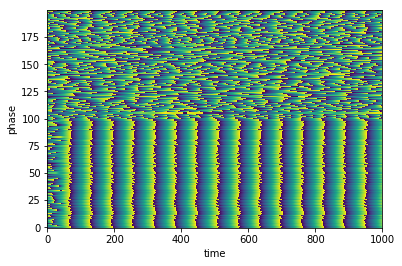

In [84]:
plt.imshow(spacetime,cmap=plt.cm.viridis,
           interpolation="nearest",
           aspect="auto",origin="lower")
plt.xlabel("time")
plt.ylabel("phase")
plt.show()

In [93]:
# Global order parameter (slow method)
t0 = time.time()
op1 = global_order_parameter_spacetime_slow(spacetime[:100,200:]).mean()
op2 = global_order_parameter_spacetime_slow(spacetime[100:,200:]).mean()
op = global_order_parameter_spacetime_slow(spacetime[:,200:]).mean()
t1 = time.time()
print "order parameter of community 1: {}\n\t\tof community 2: {}\n\t\tand of the whole network: {} ".format(op1,op2,op)
print "time to calculate slow function:{}\n".format(t1-t0) 

order parameter of community 1: 0.953712164372
		of community 2: 0.175905904468
		and of the whole network: 0.550163593667 
time to calculate slow function:0.0246121883392



In [94]:
# Global order parameter (fats method)
t2 = time.time()
op1 = global_order_parameter_spacetime(spacetime[:100,200:]).mean()
op2 = global_order_parameter_spacetime(spacetime[100:,200:]).mean()
op = global_order_parameter_spacetime(spacetime[:,200:]).mean()
t3 = time.time()
print "order parameter of community 1: {}\n\t\tof community 2: {}\n\t\tand of the whole network: {} ".format(op1,op2,op)
print "time to calculate slow function:{}\n".format(t3-t2)

order parameter of community 1: 0.953712164372
		of community 2: 0.175905904468
		and of the whole network: 0.550163593667 
time to calculate slow function:0.0139000415802



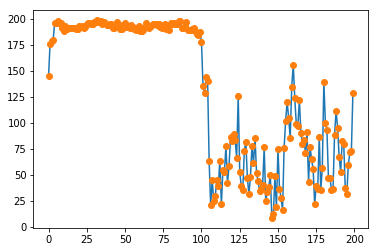

In [95]:
# Local order parameter (one time snapshot at t=100)
lop = local_order_parameter_space(spacetime[:,100],4)
plt.plot(lop,'-')
plt.plot(lop,'o')
plt.show()

In [96]:
# Local order parameter: Calculate from t0=200
lopsp = local_order_parameter_spacetime(spacetime[:,200:],4)

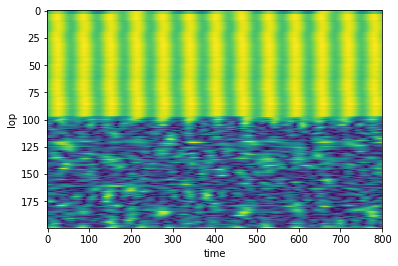

In [97]:
# Local order parameter: Plot
plt.clf()
plt.imshow(lopsp,aspect='auto')
plt.xlabel("time")
plt.ylabel("lop")
plt.show()

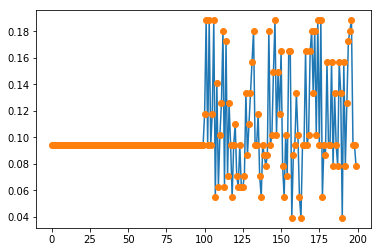

In [98]:
# Mean phase velocity: Calculate from t0=200
omega = mean_phase_velocity_spacetime(spacetime[:,200:],4)
plt.clf()
plt.plot(omega,'-')
plt.plot(omega,'o')
plt.show()

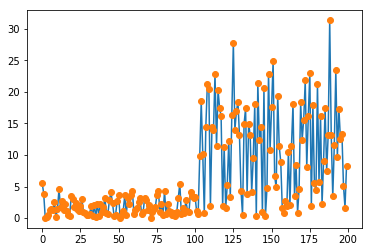

In [99]:
# Local curvature index (one time snapshot at t=100)
local_curv = local_curvature_space(spacetime[:,100],4)
plt.clf()
plt.plot(local_curv,'-')
plt.plot(local_curv,'o')
plt.show()   

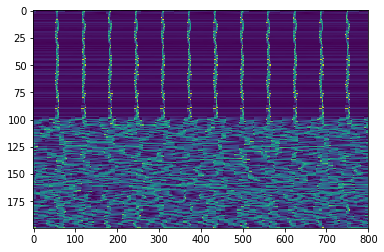

In [100]:
# Local curvature index from t0=200 untilthe end
lcsp = local_curvature_spacetime(spacetime[:,200:],4)
plt.clf()
plt.imshow(lcsp,aspect='auto')
plt.show()

In [101]:
# Chimera-like index
# The network was constructed with two communities
membership = np.concatenate(( np.zeros(100), np.ones(100) ))

print "chimera-like index:",\
        chimera_index(spacetime[:,200:], membership)

chimera-like index: 0.0762686126157


In [102]:
## Metastability index
print "metastability index:" ,\
        metastability_index(spacetime[:,200:], membership)

metastability index: 0.00259416404097
